In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
vaccines = pd.read_csv("training_H1n1.csv")

In [3]:
vaccines.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb


In [7]:
train = pd.read_csv("training_set_labels.csv")

In [21]:
vacunados_por_sexo = vaccines[["respondent_id","sex"]].merge(train,on="respondent_id")

In [32]:
vacunados_por_sexo = vacunados_por_sexo.groupby("sex").sum()

In [34]:
vacunados_por_sexo = vacunados_por_sexo.reset_index()

In [24]:
vacunados_por_sexo = vacunados_por_sexo[["sex","h1n1_vaccine"]]

In [35]:
vacunados_por_sexo.head(100)

,sex,h1n1_vaccine
0,Female,3480
1,Male,2194


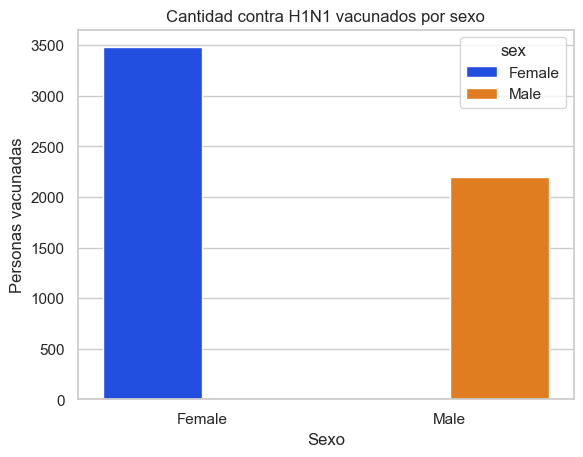

In [51]:
ax = sns.barplot(x = "sex",
                 y = "h1n1_vaccine",
                 data = vacunados_por_sexo,
                 hue="sex",
                 palette="bright"
                 )\
                .set(title='Cantidad contra H1N1 vacunados por sexo',
                    ylabel='Personas vacunadas',
                    xlabel='Sexo')

In [64]:
vacunados_preocupacion = vaccines[["h1n1_concern","respondent_id"]].merge(train,on="respondent_id")

In [65]:
vacunados_preocupacion = vacunados_preocupacion[["h1n1_concern","h1n1_vaccine"]]

In [66]:
vacunados_preocupacion.head()

,h1n1_concern,h1n1_vaccine
0,1.00,0
1,3.00,0
2,1.00,0
3,1.00,0
4,2.00,0


In [94]:
vacunados_preocupacion = vacunados_preocupacion[vacunados_preocupacion["h1n1_vaccine"]==1]

[Text(0.5, 1.0, 'Preocupacion de los vacunados contra H1N1 '),
 Text(0, 0.5, 'Probabilidad de tener ese nivel'),
 Text(0.5, 0, 'Nivel de Preocupacion')]

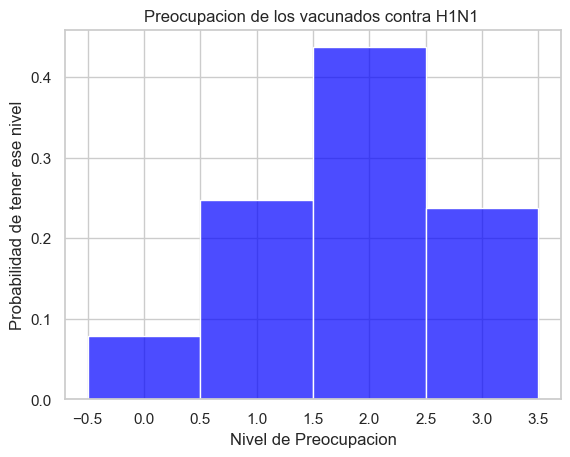

In [102]:
sns.histplot(data=vacunados_preocupacion, x="h1n1_concern", stat="probability", discrete=True,color="blue",alpha=0.7)\
            .set(title='Preocupacion de los vacunados contra H1N1 ',
                 ylabel='Probabilidad de tener ese nivel',
                 xlabel='Nivel de Preocupacion')
